<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/algoritmos_para_sba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 12 18:21:04 2025

@author: josea
"""

import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

print("Valores para a DCT")

# Função para calcular o PRD (Peak Reconstructed Distortion)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))*100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * f  # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Nc * Nppc - 1) * Ts, Nc * Nppc)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Medição da FFT original
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = len(y)  # Tamanho do sinal
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Inicializando os erros
erros = np.zeros((200, len(harm)))  # Erros para cada harmônica
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Inicializando matrizes para armazenar os erros e valores estimados
a = 2
reconstructed_fft = np.zeros([len(x), a])
valores_estimados = np.zeros((a, len(harm)))  # Inicialização corrigida

for i in range(a):  # Iteração de reconstrução
    print(f"Iteração {i + 1} de {a}")

    # Amostras do sinal
    s = y[amostras_aleatorias]

    # Matriz de Transformada Cosseno (DCT)
    A = spfft.dct(np.eye(N), norm='ortho', axis=0)
    A = A[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=len(harm))  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal usando a DCT inversa
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Calculando a FFT do sinal reconstruído
    S = np.abs(np.fft.fft(sig) / len(sig))

    # Calculando os erros e valores estimados para cada harmônica
    for idx, h in enumerate(harm):
        # Cálculo correto do índice para a FFT (frequência harmônica)
        harmonic_index = int(h * f * N / Fs)

        # Verifica o índice dentro do intervalo válido
        harmonic_index = min(harmonic_index, len(S) - 1)

        valores_estimados[i, idx] = S[harmonic_index]  # Estimativa da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

# Calculando médias das estimativas e dos erros
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)

# Exibindo resultados
print("Harmônica\tValor Real\tValor Estimado Médio\tErro Médio")
for idx, h in enumerate(harm):
    print(f"{h}\t\t{1/h:.4f}\t\t{media_valores_estimados[idx]:.4f}\t\t{media_erros[idx]:.4f}")

# Exibindo gráficos de comparação
plt.figure(figsize=(12, 6))

# Sinal original e sinal reconstruído
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.title("Sinal Original vs Reconstruído")
plt.legend()

# Erro médio por harmônica
plt.subplot(2, 1, 2)
plt.bar(harm, media_erros)
plt.title("Erro Médio por Harmônica")
plt.xlabel("Harmônica")
plt.ylabel("Erro Médio")
plt.tight_layout()
plt.show()

Iteração 1 de 200 (0.5%)
Iteração 2 de 200 (1.0%)
Iteração 3 de 200 (1.5%)
Iteração 4 de 200 (2.0%)
Iteração 5 de 200 (2.5%)
Iteração 6 de 200 (3.0%)
Iteração 7 de 200 (3.5%)
Iteração 8 de 200 (4.0%)
Iteração 9 de 200 (4.5%)
Iteração 10 de 200 (5.0%)
Iteração 11 de 200 (5.5%)
Iteração 12 de 200 (6.0%)
Iteração 13 de 200 (6.5%)
Iteração 14 de 200 (7.0%)
Iteração 15 de 200 (7.5%)
Iteração 16 de 200 (8.0%)
Iteração 17 de 200 (8.5%)
Iteração 18 de 200 (9.0%)
Iteração 19 de 200 (9.5%)
Iteração 20 de 200 (10.0%)
Iteração 21 de 200 (10.5%)
Iteração 22 de 200 (11.0%)
Iteração 23 de 200 (11.5%)
Iteração 24 de 200 (12.0%)
Iteração 25 de 200 (12.5%)
Iteração 26 de 200 (13.0%)
Iteração 27 de 200 (13.5%)
Iteração 28 de 200 (14.0%)
Iteração 29 de 200 (14.5%)
Iteração 30 de 200 (15.0%)
Iteração 31 de 200 (15.5%)
Iteração 32 de 200 (16.0%)
Iteração 33 de 200 (16.5%)
Iteração 34 de 200 (17.0%)
Iteração 35 de 200 (17.5%)
Iteração 36 de 200 (18.0%)
Iteração 37 de 200 (18.5%)
Iteração 38 de 200 (19.0%)
It

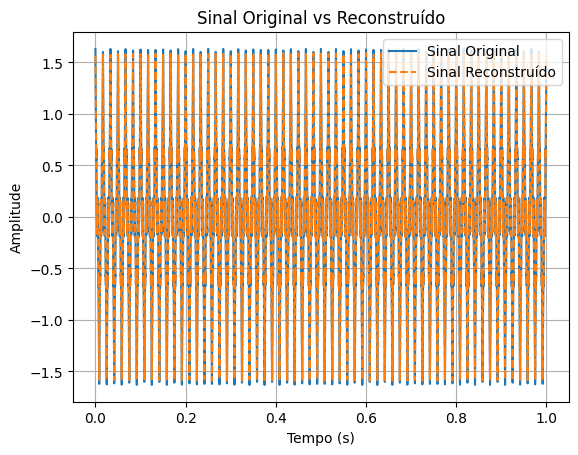

NameError: name 't_tres_ciclos' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 24 08:54:39 2025

@author: josea
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dct")
# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12        # Número de ciclos
f = 60         # Frequência fundamental (Hz)
Fs = 8192      # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for i in range(len(harm)):
    y += (1 / harm[i]) * np.cos(2 * np.pi * harm[i] * f * t)

# Medição da FFT original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y) // 2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y) // 2]

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = Fs
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y[amostras_aleatorias]
t2 = t[amostras_aleatorias]

# Matriz de Transformada Cosseno
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# Inicializando matrizes para armazenar os erros, valores estimados, RMSE e PRD
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))  # Erros para cada harmônica
valores_estimados = np.zeros((num_iteracoes, len(harm)))  # Valores estimados
rmse_values = np.zeros(num_iteracoes)  # Para armazenar os valores de RMSE
prd_values = np.zeros(num_iteracoes)   # Para armazenar os valores de PRD

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i+1} de {num_iteracoes} ({(i+1)/num_iteracoes*100:.1f}%)")

    # Gerando amostras aleatórias do sinal
    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig) // 2]

    # Calculando os valores estimados e erros para cada harmônica
    for idx, h in enumerate(harm):
        harmonic_index = int(h * f * N / Fs)  # Índice da harmônica na FFT
        harmonic_index = min(harmonic_index, len(S) - 1)  # Garantir que o índice esteja dentro dos limites
        valores_estimados[i, idx] = S[harmonic_index]  # Valor estimado da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

    # Calculando o RMSE e PRD para esta iteração
    rmse_values[i] = calculate_rmse(y, sig)
    prd_values[i] = calculate_prd(y, sig)

# Calculando as médias
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo os resultados
print("\nValores Estimados Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_valores_estimados[idx]:.4f}")

print("\nErros Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}")

# Gráficos finais
plt.figure()
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Original vs Reconstruído')
plt.grid()
plt.show()



OMP+DCT |████████████████████████████████████████| 200/200 [100.0%] | ETA: 0.0s

RESULTADOS FINAIS:
Médias das Harmônicas Reconstruídas:
Harmônica  1: 1.0003 (Erro: 0.0003)
Harmônica  3: 0.3325 (Erro: 0.0008)
Harmônica  7: 0.1424 (Erro: 0.0004)
Harmônica 15: 0.0655 (Erro: 0.0012)
Harmônica 27: 0.0312 (Erro: 0.0059)
Harmônica 35: 0.0195 (Erro: 0.0090)
Harmônica 45: 0.0000 (Erro: 0.0222)

Métricas Globais:
RMSE médio: 0.0301
PRD médio: 0.0399


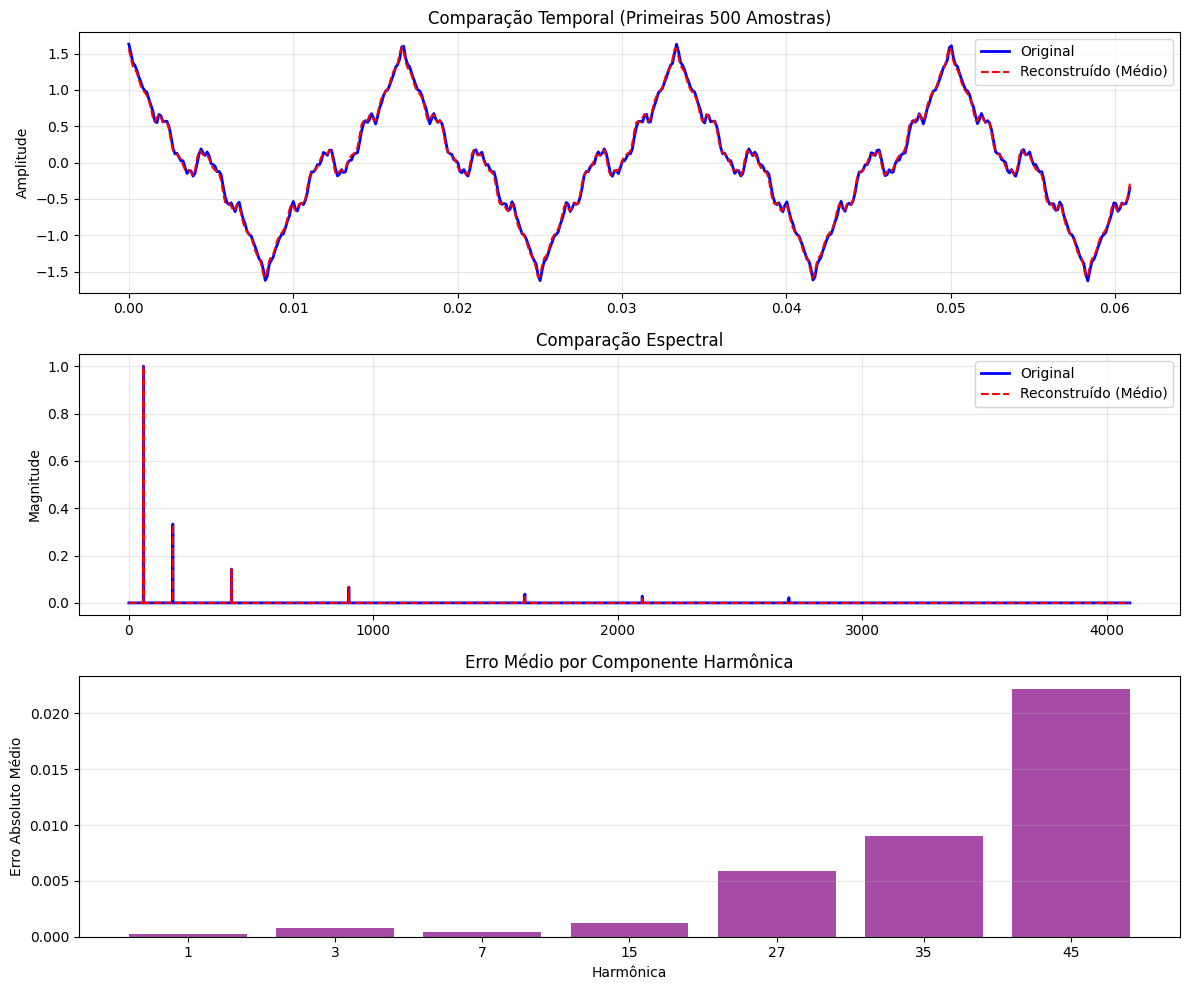

In [3]:
# -*- coding: utf-8 -*-
"""
Algoritmo de Reconstrução Compressiva com OMP e DCT - Versão Aprimorada
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import time
import sys

# ==============================================
# FUNÇÕES AUXILIARES COM CONTADOR DE PROGRESSO
# ==============================================
class ProgressTracker:
    def __init__(self, total, prefix=''):
        self.start = time.time()
        self.total = total
        self.prefix = prefix

    def update(self, iteration):
        progress = (iteration + 1) / self.total
        bar_length = 40
        filled = int(bar_length * progress)
        bar = '█' * filled + '-' * (bar_length - filled)

        elapsed = time.time() - self.start
        eta = (elapsed / (iteration + 1)) * (self.total - (iteration + 1))

        sys.stdout.write(f'\r{self.prefix} |{bar}| {iteration+1}/{self.total} '
                        f'[{progress:.1%}] | ETA: {eta:.1f}s')
        sys.stdout.flush()

def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# ==============================================
# CONFIGURAÇÃO DO SINAL
# ==============================================
# Parâmetros do sinal
Nppc = 256       # Número de pontos por ciclo
Nc = 12          # Número de ciclos
f = 60           # Frequência fundamental (Hz)
Fs = 8192        # Frequência de amostragem (Hz)
Ts = 1 / Fs      # Período de amostragem (s)
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Geração do sinal com harmônicas ímpares
harm = [1, 3, 7, 15, 27, 35, 45]
y = np.sum([(1/h) * np.cos(2 * np.pi * h * f * t) for h in harm], axis=0)

# ==============================================
# ANÁLISE ESPECTRAL (DFT/DCT)
# ==============================================
# DFT do sinal original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y)//2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y)//2]

# ==============================================
# AMOSTRAGEM COMPRESSIVA
# ==============================================
CR = 50          # Taxa de compressão (%)
N = Fs
M = int(N * (100 - CR) / 100)

# Seleção aleatória de amostras
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y[amostras_aleatorias]

# Matriz de Transformada Cosseno (DCT)
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# ==============================================
# RECONSTRUÇÃO COM OMP (COM CONTADOR VISÍVEL)
# ==============================================
num_iteracoes = 200
progress = ProgressTracker(num_iteracoes, prefix='OMP+DCT')

# Arrays para armazenamento de resultados
erros = np.zeros((num_iteracoes, len(harm)))
valores_estimados = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)
sinais_reconstruidos = np.zeros((num_iteracoes, len(y)))

for i in range(num_iteracoes):
    progress.update(i)

    # Reconstrução OMP
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal via DCT inversa
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)
    sinais_reconstruidos[i] = sig

    # Análise espectral do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig)//2]

    # Cálculo de métricas
    for idx, h in enumerate(harm):
        harmonic_index = min(int(h * f * N / Fs), len(S)-1)
        valores_estimados[i, idx] = S[harmonic_index]
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])

    rmse_values[i] = calculate_rmse(y, sig)
    prd_values[i] = calculate_prd(y, sig)

# Sinal reconstruído médio
sig_medio = np.mean(sinais_reconstruidos, axis=0)
S_medio = 2 * np.abs(np.fft.fft(sig_medio)/len(sig_medio))[:len(sig_medio)//2]

# ==============================================
# RESULTADOS E VISUALIZAÇÃO
# ==============================================
print("\n\nRESULTADOS FINAIS:")
print("="*50)
print("Médias das Harmônicas Reconstruídas:")
for h, val in zip(harm, np.mean(valores_estimados, axis=0)):
    print(f"Harmônica {h:2d}: {val:.4f} (Erro: {np.mean(erros[:,harm.index(h)]):.4f})")

print(f"\nMétricas Globais:")
print(f"RMSE médio: {np.mean(rmse_values):.4f}")
print(f"PRD médio: {np.mean(prd_values):.4f}")

# ==============================================
# VISUALIZAÇÃO COMPARATIVA
# ==============================================
plt.figure(figsize=(12, 10))

# Gráfico 1: Comparação Temporal
plt.subplot(3, 1, 1)
plt.plot(t[:500], y[:500], 'b-', label='Original', linewidth=2)
plt.plot(t[:500], sig_medio[:500], 'r--', label='Reconstruído (Médio)', linewidth=1.5)
plt.title('Comparação Temporal (Primeiras 500 Amostras)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico 2: Comparação Espectral
plt.subplot(3, 1, 2)
plt.plot(frequencies, original_fft, 'b-', label='Original', linewidth=2)
plt.plot(frequencies, S_medio, 'r--', label='Reconstruído (Médio)', linewidth=1.5)
plt.title('Comparação Espectral')
plt.ylabel('Magnitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico 3: Erros por Harmônica
plt.subplot(3, 1, 3)
plt.bar([str(h) for h in harm], np.mean(erros, axis=0), color='purple', alpha=0.7)
plt.title('Erro Médio por Componente Harmônica')
plt.xlabel('Harmônica')
plt.ylabel('Erro Absoluto Médio')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

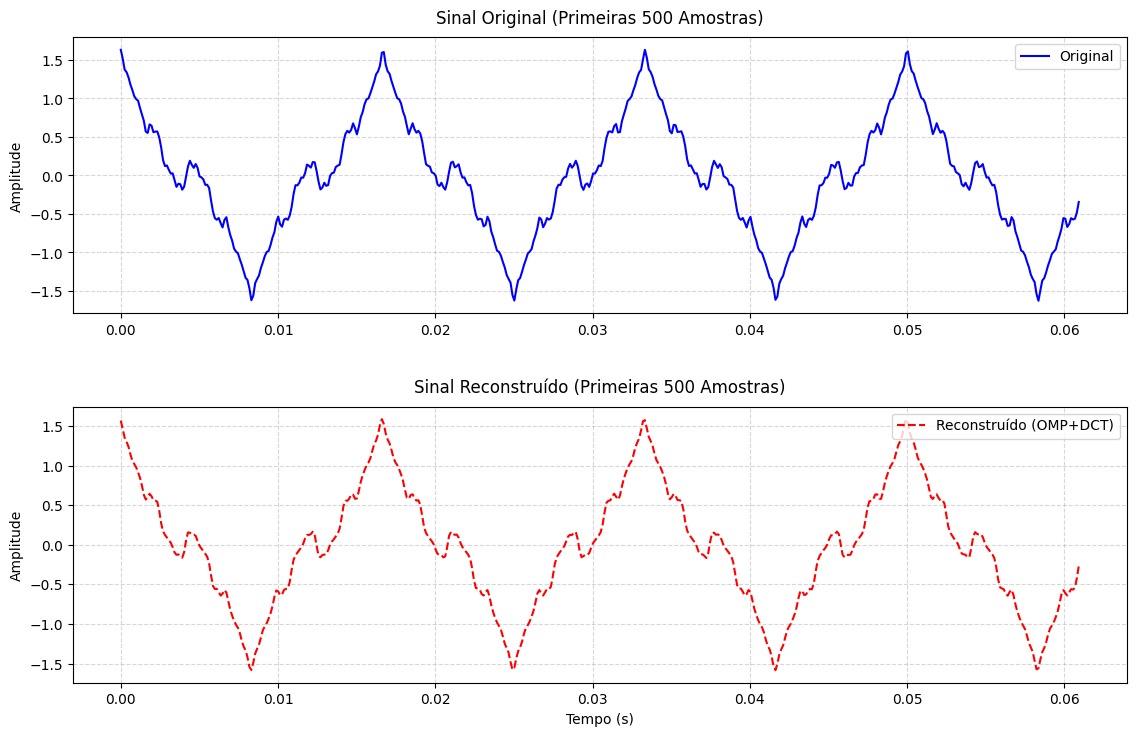

In [4]:
# -*- coding: utf-8 -*-
"""
Algoritmo com Visualização de Sinais Separados (Original vs Reconstruído)
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import time
import sys

# ==============================================
# CONFIGURAÇÃO DO SINAL (MANTIDO ORIGINAL)
# ==============================================
Nppc = 256       # Pontos por ciclo
f = 60           # Frequência fundamental (Hz)
Fs = 8192        # Frequência de amostragem (Hz)
t = np.linspace(0, (Fs - 1)/Fs, Fs)  # Vetor de tempo

# Geração do sinal com harmônicas
harm = [1, 3, 7, 15, 27, 35, 45]
y = np.sum([(1/h) * np.cos(2 * np.pi * h * f * t) for h in harm], axis=0)

# ==============================================
# AMOSTRAGEM COMPRESSIVA E RECONSTRUÇÃO (OMP+DCT)
# ==============================================
CR = 50          # Taxa de compressão (%)
M = int(Fs * (100 - CR) / 100)
amostras = np.random.choice(Fs, M, replace=False)
amostras.sort()

A = spfft.idct(np.identity(Fs), norm='ortho', axis=0)[amostras]
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
omp.fit(A, y[amostras])
sig = spfft.idct(omp.coef_, norm='ortho', axis=0)

# ==============================================
# VISUALIZAÇÃO (2 GRÁFICOS SEPARADOS E ALINHADOS)
# ==============================================
plt.figure(figsize=(12, 8))

# Gráfico 1: Sinal Original
plt.subplot(2, 1, 1)
plt.plot(t[:500], y[:500], 'b-', linewidth=1.5, label='Original')
plt.title('Sinal Original (Primeiras 500 Amostras)', fontsize=12, pad=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

# Gráfico 2: Sinal Reconstruído
plt.subplot(2, 1, 2)
plt.plot(t[:500], sig[:500], 'r--', linewidth=1.5, label='Reconstruído (OMP+DCT)')
plt.title('Sinal Reconstruído (Primeiras 500 Amostras)', fontsize=12, pad=10)
plt.xlabel('Tempo (s)', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)  # Ajuste de espaçamento
plt.show()

omp, dct
Iteração 1 de 200 (0.5%)
Iteração 2 de 200 (1.0%)
Iteração 3 de 200 (1.5%)
Iteração 4 de 200 (2.0%)
Iteração 5 de 200 (2.5%)
Iteração 6 de 200 (3.0%)
Iteração 7 de 200 (3.5%)
Iteração 8 de 200 (4.0%)
Iteração 9 de 200 (4.5%)
Iteração 10 de 200 (5.0%)
Iteração 11 de 200 (5.5%)
Iteração 12 de 200 (6.0%)
Iteração 13 de 200 (6.5%)
Iteração 14 de 200 (7.0%)
Iteração 15 de 200 (7.5%)
Iteração 16 de 200 (8.0%)
Iteração 17 de 200 (8.5%)
Iteração 18 de 200 (9.0%)
Iteração 19 de 200 (9.5%)
Iteração 20 de 200 (10.0%)
Iteração 21 de 200 (10.5%)
Iteração 22 de 200 (11.0%)
Iteração 23 de 200 (11.5%)
Iteração 24 de 200 (12.0%)
Iteração 25 de 200 (12.5%)
Iteração 26 de 200 (13.0%)
Iteração 27 de 200 (13.5%)
Iteração 28 de 200 (14.0%)
Iteração 29 de 200 (14.5%)
Iteração 30 de 200 (15.0%)
Iteração 31 de 200 (15.5%)
Iteração 32 de 200 (16.0%)
Iteração 33 de 200 (16.5%)
Iteração 34 de 200 (17.0%)
Iteração 35 de 200 (17.5%)
Iteração 36 de 200 (18.0%)
Iteração 37 de 200 (18.5%)
Iteração 38 de 200 (

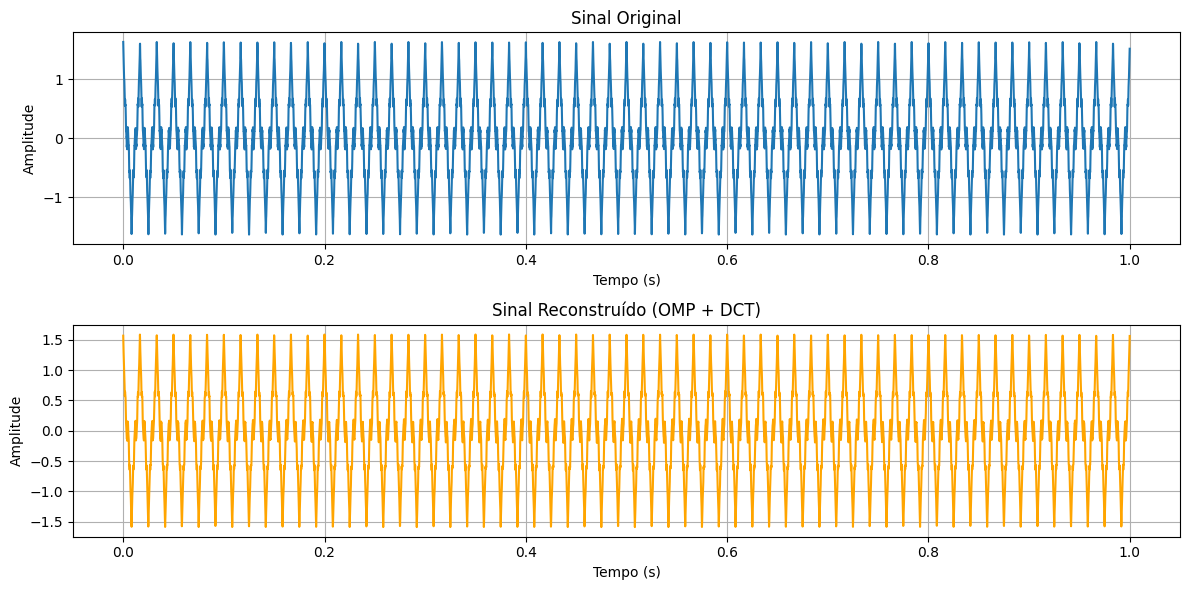

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 24 08:54:39 2025

@author: josea
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dct")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = 8192   # Frequência de amostragem
Ts = 1 / Fs # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for i in range(len(harm)):
    y += (1 / harm[i]) * np.cos(2 * np.pi * harm[i] * f * t)

# Medição da FFT original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y) // 2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y) // 2]

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = Fs
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y[amostras_aleatorias]
t2 = t[amostras_aleatorias]

# Matriz de Transformada Cosseno
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# Inicializando matrizes para armazenar os erros, valores estimados, RMSE e PRD
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))
valores_estimados = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i+1} de {num_iteracoes} ({(i+1)/num_iteracoes*100:.1f}%)")

    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # FFT do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig) // 2]

    # Cálculo de erros das harmônicas
    for idx, h in enumerate(harm):
        harmonic_index = int(h * f * N / Fs)
        harmonic_index = min(harmonic_index, len(S) - 1)
        valores_estimados[i, idx] = S[harmonic_index]
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])

    # RMSE e PRD da iteração
    rmse_values[i] = calculate_rmse(y, sig)
    prd_values[i] = calculate_prd(y, sig)

# Médias dos resultados
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibição dos resultados
print("\nValores Estimados Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_valores_estimados[idx]:.4f}")

print("\nErros Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}")

# --- GRÁFICO COMPARATIVO: SINAL ORIGINAL VS RECONSTRUÍDO ---

plt.figure(figsize=(12, 6))

# Subplot 1: Sinal Original
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Subplot 2: Sinal Reconstruído
plt.subplot(2, 1, 2)
plt.plot(t, sig, label='Sinal Reconstruído (OMP + DCT)', color='orange')
plt.title('Sinal Reconstruído (OMP + DCT)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


Progresso: 200/200
RESULTADOS DA RECONSTRUÇÃO:
Média do RMSE: 0.0503
Média do PRD: 6.6611%

Erros médios nas harmônicas:
Harmônica  1: 0.0176
Harmônica  3: 0.0123
Harmônica  7: 0.0115
Harmônica 15: 0.0111
Harmônica 27: 0.0101
Harmônica 35: 0.0092
Harmônica 45: 0.0080


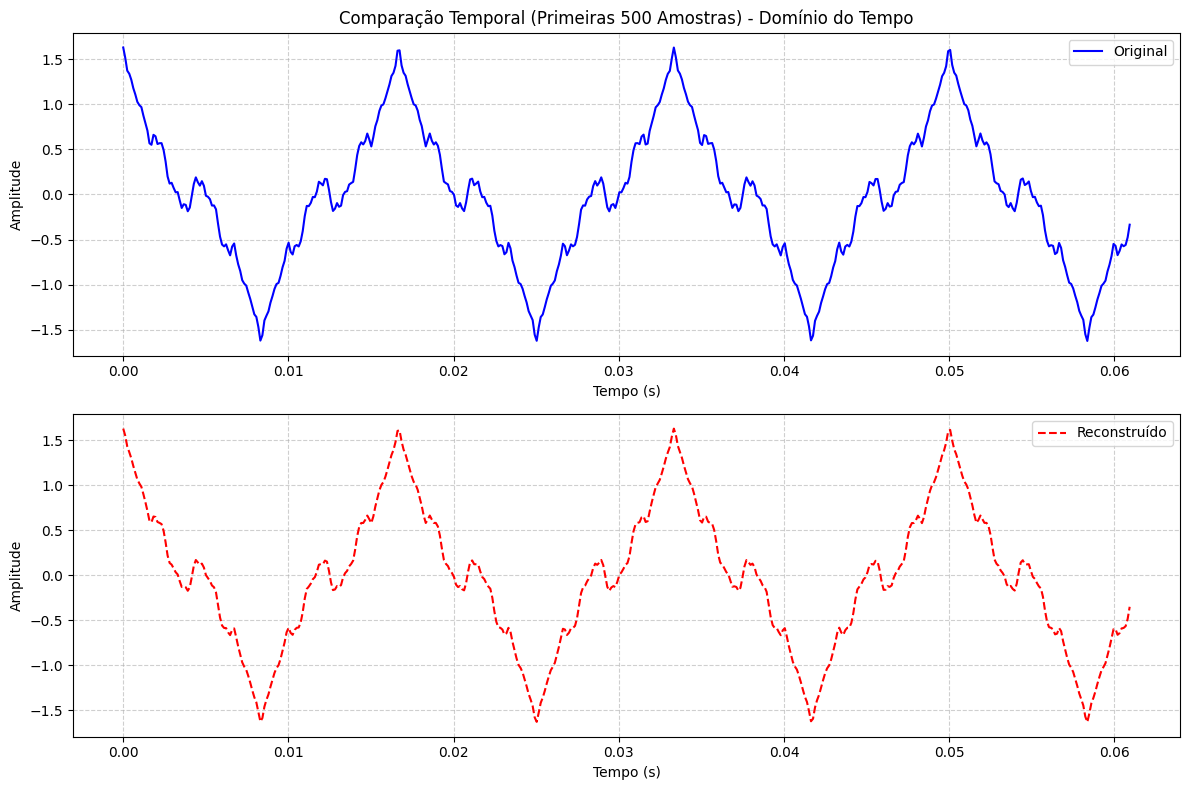

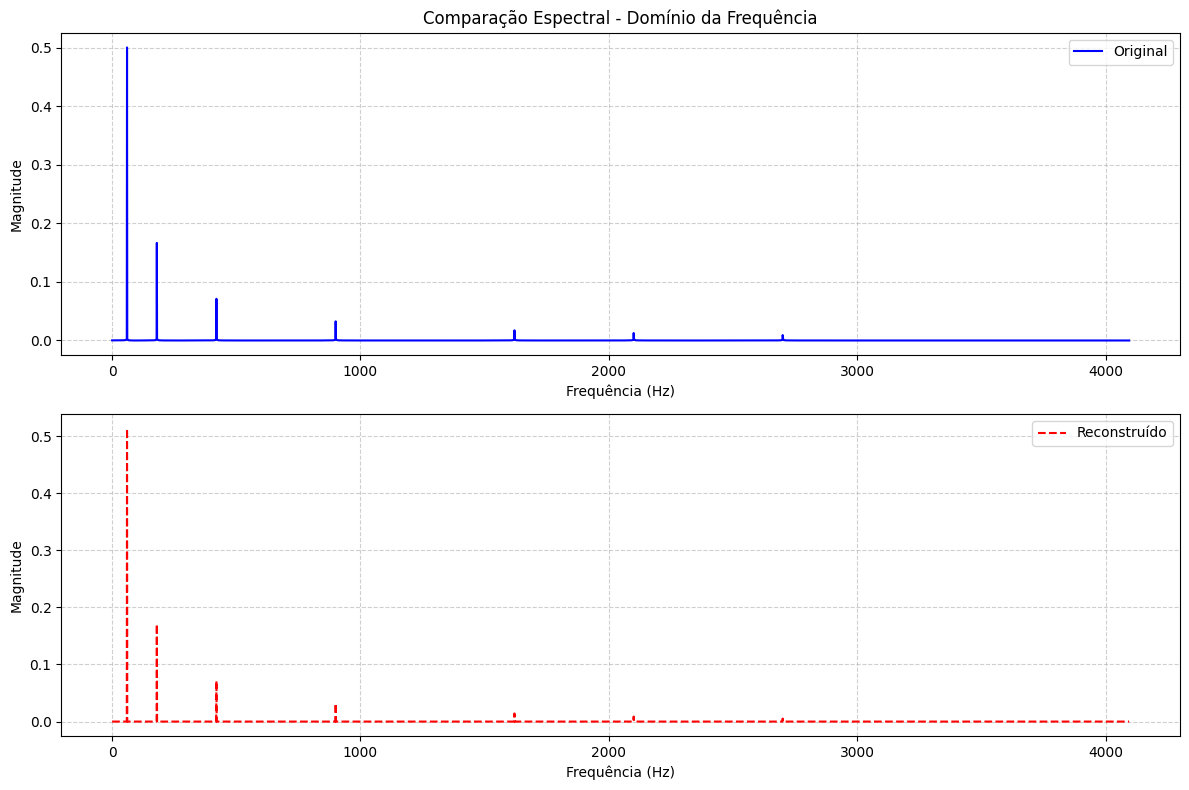

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# ==============================================
# FUNÇÕES AUXILIARES
# ==============================================
def calculate_prd(original, reconstructed):
    """Calcula o Percentual de Distorção Relativa"""
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

def calculate_rmse(original, reconstructed):
    """Calcula o Erro Médio Quadrático"""
    return np.sqrt(np.mean((original - reconstructed) ** 2))

def plot_signals(t, original, reconstructed, title):
    """Plota sinais originais e reconstruídos"""
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(t, original, color='blue', linewidth=1.5, label='Original')
    plt.title(f'{title} - Domínio do Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, reconstructed, color='red', linewidth=1.5, linestyle='--', label='Reconstruído')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_spectra(freq, original_fft, reconstructed_fft, title):
    """Plota espectros de frequência"""
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(freq, np.abs(original_fft), color='blue', linewidth=1.5, label='Original')
    plt.title(f'{title} - Domínio da Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(freq, np.abs(reconstructed_fft), color='red', linewidth=1.5, linestyle='--', label='Reconstruído')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()

# ==============================================
# PARÂMETROS DO SINAL
# ==============================================
f = 60                          # Frequência fundamental (Hz)
Fs = 8192                       # Frequência de amostragem (Hz)
Ts = 1 / Fs                     # Período de amostragem (s)
t = np.linspace(0, 1, Fs)       # Vetor de tempo (1 segundo)

# Geração do sinal com harmônicas ímpares
harmonics = [1, 3, 7, 15, 27, 35, 45]
y = np.zeros(Fs)
for h in harmonics:
    y += (1/h) * np.cos(2 * np.pi * h * f * t)

# ==============================================
# PROCESSAMENTO COM DFT/FFT
# ==============================================
# DFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# ==============================================
# AMOSTRAGEM COMPRESSIVA
# ==============================================
CR = 50                         # Taxa de compressão (%)
N = len(y)
M = int(N * (100 - CR) / 100)   # Número de medidas compressivas

# Seleção aleatória de amostras
random_samples = np.random.choice(N, M, replace=False)
random_samples.sort()

# Matriz de medição baseada na DFT
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[random_samples, :]

# Separação em partes real e imaginária
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[random_samples]
s_real = np.hstack([np.real(s), np.imag(s)])

# ==============================================
# RECONSTRUÇÃO COM OMP
# ==============================================
n_iterations = 200
n_nonzero_coefs = 14

prd_values = np.zeros(n_iterations)
rmse_values = np.zeros(n_iterations)
harmonic_errors = np.zeros((n_iterations, len(harmonics)))

for i in range(n_iterations):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    # Reconstrução do sinal
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))  # Normalização

    # Cálculo de métricas
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # Cálculo do erro nas harmônicas
    reconstructed_fft = np.fft.fft(sig) / len(sig)
    harmonic_indices = [int(h * f * len(y) / Fs) for h in harmonics]
    for j, idx in enumerate(harmonic_indices):
        harmonic_errors[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

    print(f'Progresso: {i+1}/{n_iterations}', end='\r')

# ==============================================
# RESULTADOS E VISUALIZAÇÃO
# ==============================================
# Cálculo das médias
mean_harmonic_errors = np.mean(harmonic_errors, axis=0)
mean_rmse = np.mean(rmse_values)
mean_prd = np.mean(prd_values)

# Resultados numéricos
print("\nRESULTADOS DA RECONSTRUÇÃO:")
print("="*50)
print(f"Média do RMSE: {mean_rmse:.4f}")
print(f"Média do PRD: {mean_prd:.4f}%")
print("\nErros médios nas harmônicas:")
for h, err in zip(harmonics, mean_harmonic_errors):
    print(f"Harmônica {h:2d}: {err:.4f}")

# Visualização dos sinais
plot_signals(t[:500], y[:500], sig[:500],
            "Comparação Temporal (Primeiras 500 Amostras)")

# Visualização dos espectros (apenas frequências positivas)
positive_freq = frequencies[:N//2]
plot_spectra(positive_freq, original_fft[:N//2], reconstructed_fft[:N//2],
            "Comparação Espectral")


Média do erro nas harmônicas (Amostragem Compressiva):
Harmônica 1: 0.0000
Harmônica 3: 0.0000
Harmônica 7: 0.0000
Harmônica 15: 0.0000
Harmônica 27: 0.0000
Harmônica 35: 0.0000
Harmônica 45: 0.0000

Média do RMSE (Amostragem Compressiva): 0.0000
Média do PRD (Amostragem Compressiva): 0.0000%


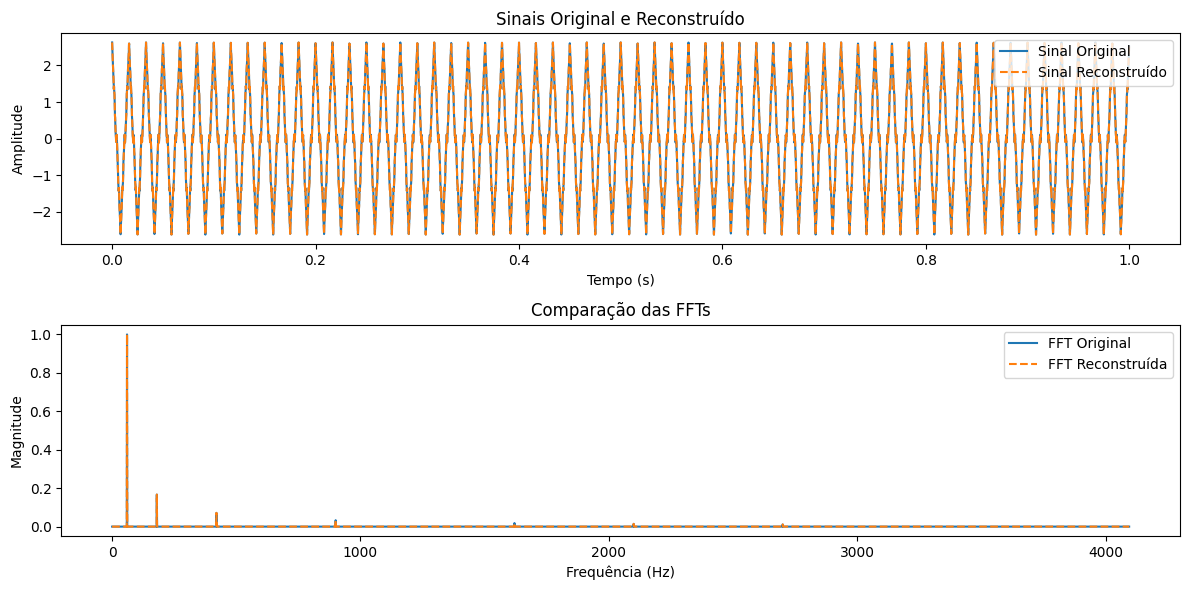

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Loop de reconstrução
for i in range(200):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

    print(f"Iteração:{i+1} de 200")

# Média dos erros para as harmônicas
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibir os resultados
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd:.4f}%")

# Gerar gráficos
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Sinais Original e Reconstruído')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='FFT Original')
plt.plot(frequencies[:N//2], np.abs(reconstructed_fft[:N//2]), label='FFT Reconstruída', linestyle='dashed')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Comparação das FFTs')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("Comparação entre a amostragem tradicional e AC:")
# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Frequência de amostragem mínima de Nyquist
f_max = max(harm) * f  # Maior frequência presente no sinal
Fs_nyquist = 2 * f_max  # Frequência de amostragem de Nyquist

# Parâmetros de amostragem de Nyquist
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.linspace(0, (Fs_nyquist - 1) * Ts_nyquist, Fs_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)

# Gerar o sinal Nyquist com componentes harmônicas
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# FFT do sinal de Nyquist (normalizada)
original_fft_nyquist = np.fft.fft(y_nyquist) / len(y_nyquist)
frequencies_nyquist = np.fft.fftfreq(len(y_nyquist), d=Ts_nyquist)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros para a amostragem compressiva
erros = np.zeros((200, 7))
rmse_values_compressiva = np.zeros(200)
prd_values_compressiva = np.zeros(200)

# Loop de reconstrução para amostragem compressiva
for i in range(200):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values_compressiva[i] = calculate_prd(y, sig)
    rmse_values_compressiva[i] = calculate_rmse(y, sig)
    reconstructed_fft_compressiva = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft_compressiva[idx])

# Média dos erros para as harmônicas na amostragem compressiva
erros_medios_compressiva = np.mean(erros, axis=0)
media_rmse_compressiva = np.mean(rmse_values_compressiva)
media_prd_compressiva = np.mean(prd_values_compressiva)

# Exibir os resultados para a amostragem compressiva
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_compressiva[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse_compressiva:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd_compressiva:.4f}%")

# Média de erros para a amostragem de Nyquist
rmse_nyquist = calculate_rmse(y_nyquist, y_nyquist)  # O erro é zero, pois a amostragem é feita corretamente
prd_nyquist = calculate_prd(y_nyquist, y_nyquist)

# Exibir os resultados para a amostragem de Nyquist
print(f"\nMédia do RMSE (Amostragem Nyquist): {rmse_nyquist:.4f}")
print(f"Média do PRD (Amostragem Nyquist): {prd_nyquist:.4f}%")

# Comparar resultados
print("\nComparação dos Resultados:")
print(f"RMSE (Amostragem Compressiva) vs Nyquist: {media_rmse_compressiva:.4f} vs {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Compressiva) vs Nyquist: {media_prd_compressiva:.4f}% vs {prd_nyquist:.4f}%")

# Mostrar número de iterações para a reconstrução com OMP
print(f"\nNúmero de iterações de reconstrução com OMP: 200")



Média do erro nas harmônicas (Amostragem Compressiva):
Harmônica 1: 0.0000
Harmônica 3: 0.0000
Harmônica 7: 0.0000
Harmônica 15: 0.0000
Harmônica 27: 0.0000
Harmônica 35: 0.0000
Harmônica 45: 0.0000

Média do RMSE (Amostragem Compressiva): 0.0000
Média do PRD (Amostragem Compressiva): 0.0000%

Média do RMSE (Amostragem Nyquist): 0.0000
Média do PRD (Amostragem Nyquist): 0.0000%

Comparação dos Resultados:
RMSE (Amostragem Compressiva) vs Nyquist: 0.0000 vs 0.0000
PRD (Amostragem Compressiva) vs Nyquist: 0.0000% vs 0.0000%

Número de iterações de reconstrução com OMP: 200



Resultados da Amostragem Compressiva com CoSaMP
--------------------------------------------
Média do erro nas harmônicas:
Harmônica  1: 0.0340
Harmônica  3: 0.0058
Harmônica  7: 0.0024
Harmônica 15: 0.0009
Harmônica 27: 0.0185
Harmônica 35: 0.0143
Harmônica 45: 0.0111

Média do RMSE: 0.0611
Média do PRD: 4.2459%


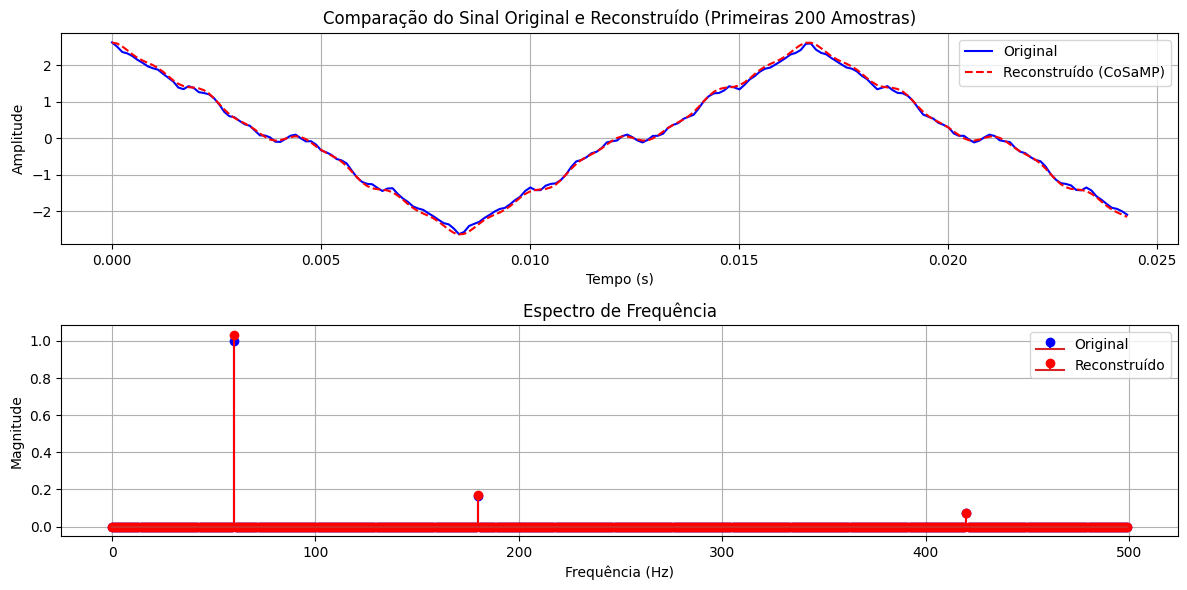

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Funções auxiliares
def calculate_prd(original, reconstructed):
    """Calcula o Percentual Root-mean-square Deviation"""
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

def calculate_rmse(original, reconstructed):
    """Calcula o Root Mean Square Error"""
    return np.sqrt(np.mean((original - reconstructed) ** 2))

def cosamp(A, y, k, tol=1e-6, max_iter=100):
    """
    Implementação do algoritmo CoSaMP (Compressive Sampling Matching Pursuit)

    Parâmetros:
    A: Matriz de medição (2M x 2N)
    y: Vetor de medidas (2M)
    k: Esparsidade estimada
    tol: Tolerância para convergência
    max_iter: Número máximo de iterações

    Retorna:
    x: Vetor esparso reconstruído (2N)
    """
    M, N = A.shape
    N = N // 2  # N original (partes real e imaginária)

    x = np.zeros(2*N)
    residual = y.copy()

    for _ in range(max_iter):
        # Passo 1: Formar proxy
        proxy = A.T @ residual

        # Passo 2: Identificar 2k maiores componentes
        omega = np.argpartition(np.abs(proxy), -2*k)[-2*k:]

        # Passo 3: Formar suporte unido
        T = np.union1d(omega, np.where(x != 0)[0])

        # Passo 4: Solução por mínimos quadrados
        b = np.zeros(2*N)
        try:
            b[T] = np.linalg.lstsq(A[:, T], y, rcond=None)[0]
        except np.linalg.LinAlgError:
            break

        # Passo 5: Manter k maiores elementos
        k_largest = np.argpartition(np.abs(b), -k)[-k:]
        x_new = np.zeros(2*N)
        x_new[k_largest] = b[k_largest]

        # Passo 6: Atualizar residual
        residual_new = y - A @ x_new

        # Critério de parada
        if np.linalg.norm(residual_new) < tol:
            break

        x, residual = x_new, residual_new

    return x

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem (Hz)
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50
N = len(y)
M = int(N * (100 - CR) / 100)  # Número de medidas
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([
    np.hstack([np.real(A_complex), -np.imag(A_complex)]),
    np.hstack([np.imag(A_complex), np.real(A_complex)])
])

# Medições compressivas (parte real e imaginária)
s = y[amostras_aleatorias]
s_real = np.concatenate([np.real(s), np.imag(s)])

# Parâmetros do CoSaMP
k = 15 # Esparsidade estimada (número de componentes significativas)

# Inicialização de variáveis para armazenar resultados
num_iteracoes = 200
erros_cosamp = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)

# Loop de reconstrução
for i in range(num_iteracoes):
    # Reconstrução com CoSaMP
    recovered_coeffs = cosamp(A_real, s_real, k)

    # Separar partes real e imaginária
    N = len(y)
    coeffs_real = recovered_coeffs[:N]
    coeffs_imag = recovered_coeffs[N:2*N]

    # Reconstruir sinal no domínio do tempo
    freq_coeffs = coeffs_real + 1j*coeffs_imag
    sig = np.fft.ifft(freq_coeffs)
    sig = np.real(sig)

    # Normalização de amplitude
    if np.max(np.abs(sig)) > 1e-6:  # Evitar divisão por zero
        sig = sig * (np.max(np.abs(y)) / np.max(np.abs(sig)))

    # Cálculo das métricas
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    # Cálculo do erro nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros_cosamp[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

# Cálculo das médias
erros_medios = np.mean(erros_cosamp, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibição dos resultados
print("\nResultados da Amostragem Compressiva com CoSaMP")
print("--------------------------------------------")
print("Média do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h:2d}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

# Sinal original vs reconstruído (melhor iteração)
best_idx = np.argmin(prd_values)
recovered_coeffs = cosamp(A_real, s_real, k)
coeffs_real = recovered_coeffs[:N]
coeffs_imag = recovered_coeffs[N:2*N]
freq_coeffs = coeffs_real + 1j*coeffs_imag
sig = np.real(np.fft.ifft(freq_coeffs))
if np.max(np.abs(sig)) > 1e-6:
    sig = sig * (np.max(np.abs(y)) / np.max(np.abs(sig)))

plt.subplot(2, 1, 1)
plt.plot(t[:200], y[:200], 'b', label='Original')
plt.plot(t[:200], sig[:200], 'r--', label='Reconstruído (CoSaMP)')
plt.title('Comparação do Sinal Original e Reconstruído (Primeiras 200 Amostras)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Espectro de frequência
plt.subplot(2, 1, 2)
plt.stem(frequencies[:500], np.abs(original_fft[:500]), 'b', markerfmt='bo', label='Original')
plt.stem(frequencies[:500], np.abs(reconstructed_fft[:500]), 'r', markerfmt='ro', label='Reconstruído')
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


COMPARAÇÃO DOS MÉTODOS DE AMOSTRAGEM
Parâmetros: Frequência fundamental = 60Hz, Taxa de compressão = 50%
Número de execuções: 200 iterações

AMOSTRAGEM DE NYQUIST
--------------------------------------------------
Frequência de Nyquist: 5400.00 Hz
PRD: 0.9691%
RMSE: 0.013940

AMOSTRAGEM COMPRESSIVA (CoSaMP)
--------------------------------------------------
Número médio de iterações do CoSaMP por reconstrução: 2.0
Total de iterações do CoSaMP: 400
Tempo total de execução: 96.91 segundos

Média do erro nas harmônicas:
Harmônica  1: 0.0593
Harmônica  3: 0.0105
Harmônica  7: 0.0041
Harmônica 15: 0.0333
Harmônica 27: 0.0185
Harmônica 35: 0.0143
Harmônica 45: 0.0111

PRD médio: 7.2473%
RMSE médio: 0.104253


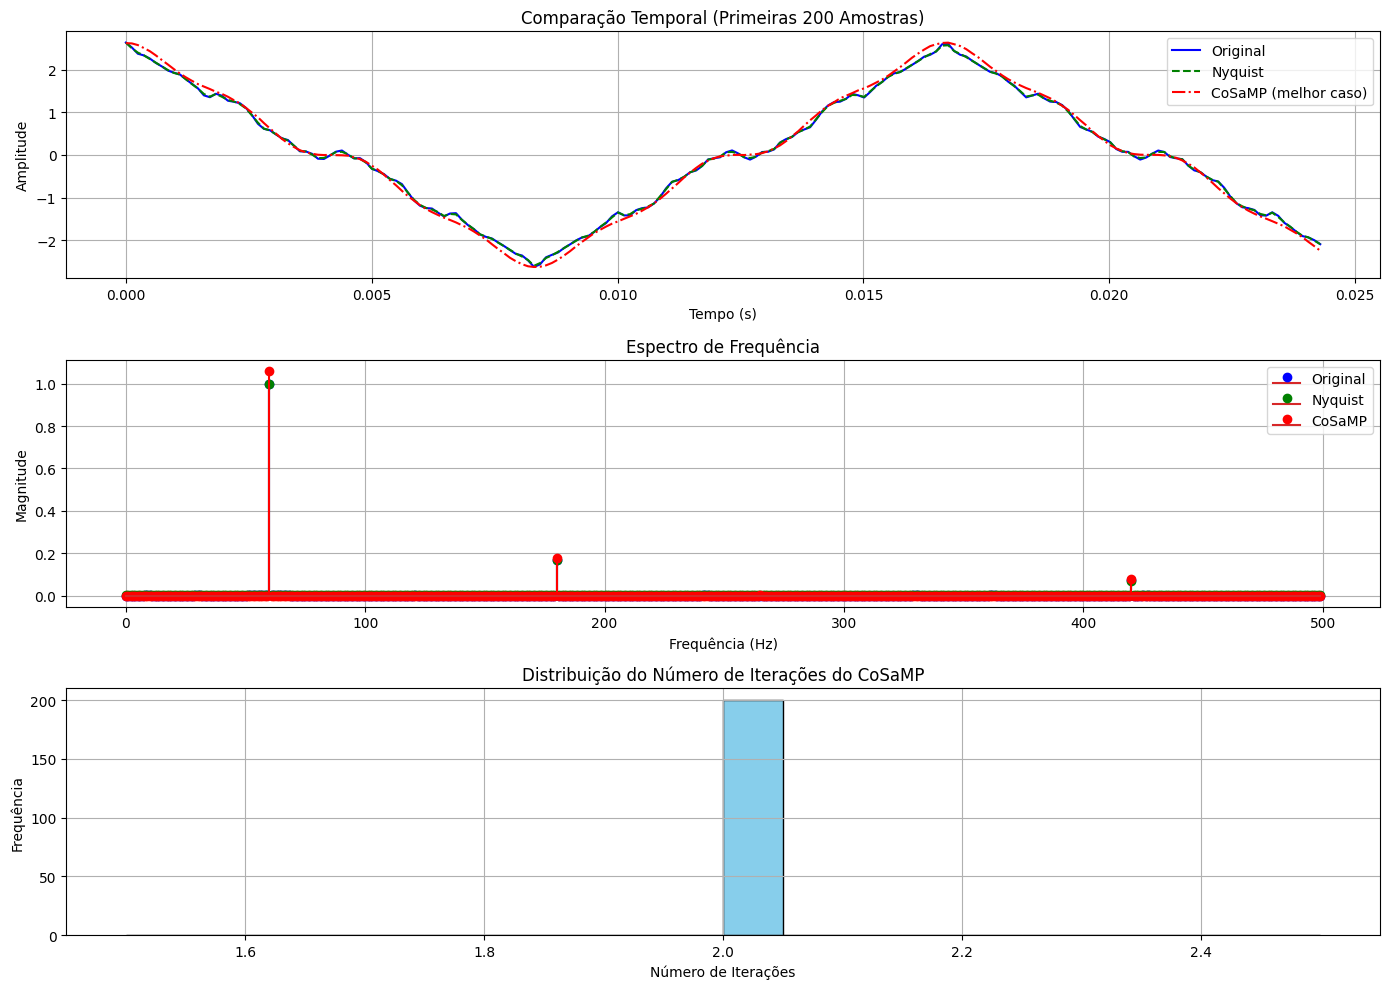

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Funções auxiliares
def calculate_prd(original, reconstructed):
    """Calcula o Percentual Root-mean-square Deviation"""
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

def calculate_rmse(original, reconstructed):
    """Calcula o Root Mean Square Error"""
    return np.sqrt(np.mean((original - reconstructed) ** 2))

def cosamp(A, y, k, tol=1e-6, max_iter=100):
    """
    Implementação do algoritmo CoSaMP (Compressive Sampling Matching Pursuit)
    Retorna também o número de iterações executadas
    """
    M, N = A.shape
    x = np.zeros(N)
    residual = y.copy()
    iterations = 0

    for iterations in range(max_iter):
        proxy = A.T @ residual
        omega = np.argpartition(np.abs(proxy), -2*k)[-2*k:]
        T = np.union1d(omega, np.where(x != 0)[0])

        b = np.zeros(N)
        try:
            b[T] = np.linalg.lstsq(A[:, T], y, rcond=None)[0]
        except:
            break

        k_largest = np.argpartition(np.abs(b), -k)[-k:]
        x_new = np.zeros(N)
        x_new[k_largest] = b[k_largest]

        residual_new = y - A @ x_new

        if np.linalg.norm(residual_new) < tol:
            iterations += 1
            break

        x, residual = x_new, residual_new

    return x, iterations

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem (Hz)
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

## 1. Amostragem de Nyquist
f_max = max(harm) * f
Fs_nyquist = 2 * f_max
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.arange(0, t[-1], Ts_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# Reconstrução Nyquist (interpolação)
y_nyquist_reconstructed = np.interp(t, t_nyquist, y_nyquist)

# Métricas Nyquist
prd_nyquist = calculate_prd(y, y_nyquist_reconstructed)
rmse_nyquist = calculate_rmse(y, y_nyquist_reconstructed)

## 2. Amostragem Compressiva com CoSaMP
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Preparar matriz real
A_real = np.vstack([
    np.hstack([np.real(A_complex), -np.imag(A_complex)]),
    np.hstack([np.imag(A_complex), np.real(A_complex)])
])

# Medições
s = y[amostras_aleatorias]
s_real = np.concatenate([np.real(s), np.imag(s)])

# Parâmetros CoSaMP
k = 14
num_iteracoes = 200
total_iterations = 0

# Resultados
erros_cosamp = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)
iter_counts = np.zeros(num_iteracoes, dtype=int)

# Processamento
start_time = time()
for i in range(num_iteracoes):
    recovered_coeffs, iters = cosamp(A_real, s_real, k)
    iter_counts[i] = iters
    total_iterations += iters

    # Reconstrução do sinal
    coeffs_real = recovered_coeffs[:N]
    coeffs_imag = recovered_coeffs[N:]
    freq_coeffs = coeffs_real + 1j*coeffs_imag
    sig = np.real(np.fft.ifft(freq_coeffs))

    if np.max(np.abs(sig)) > 1e-6:
        sig = sig * (np.max(np.abs(y)) / np.max(np.abs(sig)))

    # Métricas
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    # Erros por harmônica
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros_cosamp[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

# Cálculo das médias
erros_medios = np.mean(erros_cosamp, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)
media_iter = np.mean(iter_counts)
execution_time = time() - start_time

## 3. Apresentação dos Resultados
print("\nCOMPARAÇÃO DOS MÉTODOS DE AMOSTRAGEM")
print("="*50)
print(f"Parâmetros: Frequência fundamental = {f}Hz, Taxa de compressão = {CR}%")
print(f"Número de execuções: {num_iteracoes} iterações\n")

print("AMOSTRAGEM DE NYQUIST")
print("-"*50)
print(f"Frequência de Nyquist: {Fs_nyquist:.2f} Hz")
print(f"PRD: {prd_nyquist:.4f}%")
print(f"RMSE: {rmse_nyquist:.6f}\n")

print("AMOSTRAGEM COMPRESSIVA (CoSaMP)")
print("-"*50)
print(f"Número médio de iterações do CoSaMP por reconstrução: {media_iter:.1f}")
print(f"Total de iterações do CoSaMP: {total_iterations}")
print(f"Tempo total de execução: {execution_time:.2f} segundos")
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h:2d}: {erros_medios[idx]:.4f}")

print(f"\nPRD médio: {media_prd:.4f}%")
print(f"RMSE médio: {media_rmse:.6f}")

## 4. Visualização
plt.figure(figsize=(14, 10))

# Sinal no tempo
plt.subplot(3, 1, 1)
plt.plot(t[:200], y[:200], 'b', label='Original')
plt.plot(t[:200], y_nyquist_reconstructed[:200], 'g--', label='Nyquist')
best_idx = np.argmin(prd_values)
recovered_coeffs, _ = cosamp(A_real, s_real, k)
sig = np.real(np.fft.ifft(recovered_coeffs[:N] + 1j*recovered_coeffs[N:]))
sig = sig * (np.max(np.abs(y)) / np.max(np.abs(sig)))
plt.plot(t[:200], sig[:200], 'r-.', label='CoSaMP (melhor caso)')
plt.title('Comparação Temporal (Primeiras 200 Amostras)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Espectro de frequência
plt.subplot(3, 1, 2)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)
plt.stem(frequencies[:500], np.abs(original_fft[:500]), 'b', markerfmt='bo', label='Original')
plt.stem(frequencies[:500], np.abs(np.fft.fft(y_nyquist_reconstructed)/len(y))[:500], 'g', markerfmt='go', label='Nyquist')
plt.stem(frequencies[:500], np.abs(np.fft.fft(sig)/len(y))[:500], 'r', markerfmt='ro', label='CoSaMP')
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Distribuição de iterações do CoSaMP
plt.subplot(3, 1, 3)
plt.hist(iter_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Iterações do CoSaMP')
plt.xlabel('Número de Iterações')
plt.ylabel('Frequência')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("Comparação entre a amostragem tradicional e AC:")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Implementação do CoSaMP
def cosamp(A, y, k, tol=1e-6, max_iter=100):
    """Algoritmo CoSaMP para reconstrução compressiva"""
    x = np.zeros(A.shape[1])
    residual = y.copy()
    iterations = 0

    for iterations in range(max_iter):
        # Passo 1: Formar proxy
        proxy = A.T @ residual

        # Passo 2: Identificar 2k maiores componentes
        omega = np.argpartition(np.abs(proxy), -2*k)[-2*k:]

        # Passo 3: Formar suporte unido
        T = np.union1d(omega, np.where(x != 0)[0])

        # Passo 4: Solução por mínimos quadrados
        b = np.zeros(A.shape[1])
        try:
            b[T] = np.linalg.lstsq(A[:, T], y, rcond=None)[0]
        except np.linalg.LinAlgError:
            break

        # Passo 5: Manter k maiores elementos
        k_largest = np.argpartition(np.abs(b), -k)[-k:]
        x_new = np.zeros(A.shape[1])
        x_new[k_largest] = b[k_largest]

        # Passo 6: Atualizar residual
        residual_new = y - A @ x_new

        # Critério de parada
        if np.linalg.norm(residual_new) < tol:
            iterations += 1
            break

        x, residual = x_new, residual_new

    return x, iterations

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Frequência de amostragem mínima de Nyquist
f_max = max(harm) * f  # Maior frequência presente no sinal
Fs_nyquist = 2 * f_max  # Frequência de amostragem de Nyquist

# Parâmetros de amostragem de Nyquist
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.linspace(0, (Fs_nyquist - 1) * Ts_nyquist, Fs_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)

# Gerar o sinal Nyquist com componentes harmônicas
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# FFT do sinal de Nyquist (normalizada)
original_fft_nyquist = np.fft.fft(y_nyquist) / len(y_nyquist)
frequencies_nyquist = np.fft.fftfreq(len(y_nyquist), d=Ts_nyquist)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros para a amostragem compressiva
erros = np.zeros((200, 7))
rmse_values_compressiva = np.zeros(200)
prd_values_compressiva = np.zeros(200)
iterations_count = np.zeros(200, dtype=int)

# Loop de reconstrução para amostragem compressiva com CoSaMP
for i in range(200):
    recovered_coeffs, iters = cosamp(A_real, s_real, k=14)
    iterations_count[i] = iters

    # Reconstrução do sinal
    coeffs_real = recovered_coeffs[:N]
    coeffs_imag = recovered_coeffs[N:] if len(recovered_coeffs) > N else np.zeros(N)
    freq_coeffs = coeffs_real + 1j*coeffs_imag
    sig = np.fft.ifft(freq_coeffs)
    sig = np.real(sig)

    # Normalização
    if np.max(np.abs(sig)) > 1e-6:
        sig = sig * (np.max(np.abs(y)) / np.max(np.abs(sig)))

    # Cálculo das métricas
    prd_values_compressiva[i] = calculate_prd(y, sig)
    rmse_values_compressiva[i] = calculate_rmse(y, sig)
    reconstructed_fft_compressiva = np.fft.fft(sig) / len(sig)

    # Cálculo do erro nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft_compressiva[idx])

# Média dos erros para as harmônicas na amostragem compressiva
erros_medios_compressiva = np.mean(erros, axis=0)
media_rmse_compressiva = np.mean(rmse_values_compressiva)
media_prd_compressiva = np.mean(prd_values_compressiva)
media_iterations = np.mean(iterations_count)

# Exibir os resultados para a amostragem compressiva
print("\nMédia do erro nas harmônicas (Amostragem Compressiva com CoSaMP):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_compressiva[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse_compressiva:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd_compressiva:.4f}%")
print(f"Média de iterações por reconstrução: {media_iterations:.1f}")

# Cálculo das métricas para Nyquist (executado uma única vez)
y_nyquist_reconstructed = np.interp(t, t_nyquist, y_nyquist)
rmse_nyquist = calculate_rmse(y, y_nyquist_reconstructed)
prd_nyquist = calculate_prd(y, y_nyquist_reconstructed)

# Exibir os resultados para a amostragem de Nyquist
print(f"\nRMSE (Amostragem Nyquist): {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Nyquist): {prd_nyquist:.4f}%")

# Comparar resultados
print("\nComparação dos Resultados:")
print(f"RMSE (Amostragem Compressiva) vs Nyquist: {media_rmse_compressiva:.4f} vs {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Compressiva) vs Nyquist: {media_prd_compressiva:.4f}% vs {prd_nyquist:.4f}%")

# Mostrar número de iterações para a reconstrução com CoSaMP
print(f"\nNúmero total de iterações de reconstrução com CoSaMP: {np.sum(iterations_count)}")
print(f"Número de execuções: 200")

Comparação entre a amostragem tradicional e AC:

Média do erro nas harmônicas (Amostragem Compressiva com CoSaMP):
Harmônica 1: 0.0333
Harmônica 3: 0.0062
Harmônica 7: 0.0028
Harmônica 15: 0.0010
Harmônica 27: 0.0185
Harmônica 35: 0.0143
Harmônica 45: 0.0111

Média do RMSE (Amostragem Compressiva): 0.0605
Média do PRD (Amostragem Compressiva): 4.2055%
Média de iterações por reconstrução: 2.0

RMSE (Amostragem Nyquist): 0.0139
PRD (Amostragem Nyquist): 0.9691%

Comparação dos Resultados:
RMSE (Amostragem Compressiva) vs Nyquist: 0.0605 vs 0.0139
PRD (Amostragem Compressiva) vs Nyquist: 4.2055% vs 0.9691%

Número total de iterações de reconstrução com CoSaMP: 400
Número de execuções: 200


Iniciando a reconstrução do sinal usando Amostragem Compressiva...
Iteração 0/8192 - Reconstruindo coeficiente 0
Iteração 100/8192 - Reconstruindo coeficiente 100
Iteração 200/8192 - Reconstruindo coeficiente 200
Iteração 300/8192 - Reconstruindo coeficiente 300
Iteração 400/8192 - Reconstruindo coeficiente 400
Iteração 500/8192 - Reconstruindo coeficiente 500
Iteração 600/8192 - Reconstruindo coeficiente 600
Iteração 700/8192 - Reconstruindo coeficiente 700
Iteração 800/8192 - Reconstruindo coeficiente 800
Iteração 900/8192 - Reconstruindo coeficiente 900
Iteração 1000/8192 - Reconstruindo coeficiente 1000
Iteração 1100/8192 - Reconstruindo coeficiente 1100
Iteração 1200/8192 - Reconstruindo coeficiente 1200
Iteração 1300/8192 - Reconstruindo coeficiente 1300
Iteração 1400/8192 - Reconstruindo coeficiente 1400
Iteração 1500/8192 - Reconstruindo coeficiente 1500
Iteração 1600/8192 - Reconstruindo coeficiente 1600
Iteração 1700/8192 - Reconstruindo coeficiente 1700
Iteração 1800/8192 - 

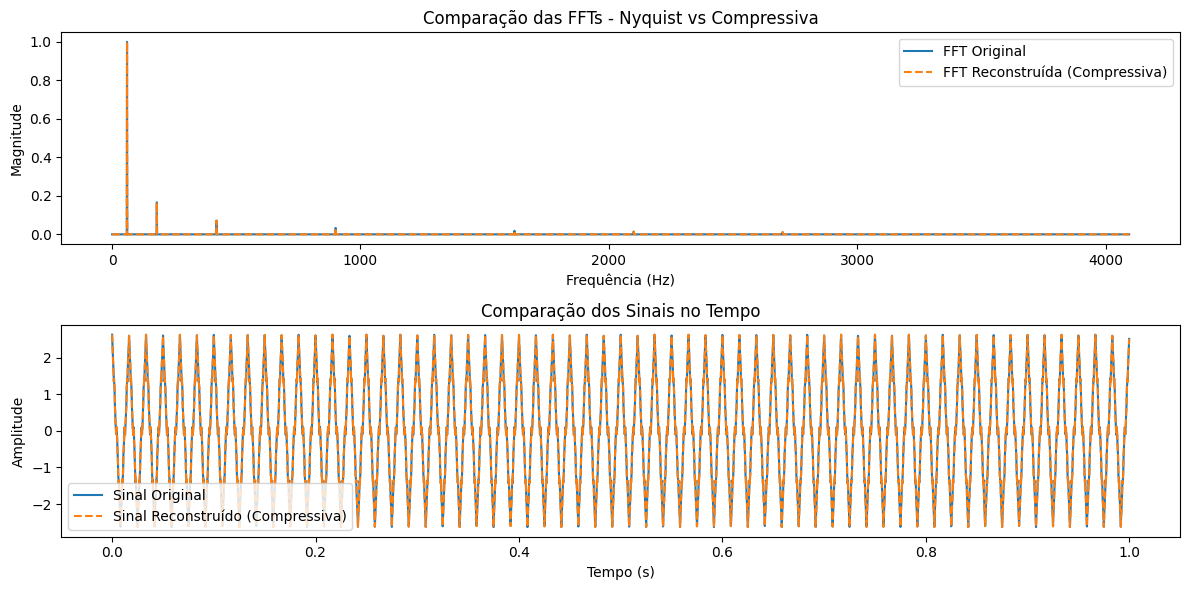

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# ===============================
# Amostragem de Nyquist (sem compressão)
# ===============================
nyquist_signal = y  # Sinal amostrado de Nyquist

# ================================
# Amostragem Compressiva
# ================================
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros
erros_nyquist = np.zeros(len(harm))
erros_compressiva = np.zeros(len(harm))

# Loop de reconstrução para Amostragem Compressiva
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
omp.fit(A_real, s_real)
recovered_coeffs = omp.coef_

# Mensagem de progresso do iterador
print("Iniciando a reconstrução do sinal usando Amostragem Compressiva...")

# Iterando sobre os coeficientes para exibir o progresso
for iteration in range(len(recovered_coeffs)):
    if iteration % 100 == 0:  # Exibe a cada 100 iterações
        print(f"Iteração {iteration}/{len(recovered_coeffs)} - Reconstruindo coeficiente {iteration}")

# Sinal reconstruído pela Amostragem Compressiva
sig_compressiva = np.fft.ifft(recovered_coeffs)
sig_compressiva = np.real(sig_compressiva)
sig_compressiva = sig_compressiva * (np.max(y) / np.max(sig_compressiva))

# Calcular os erros médios por harmônica
for i, h in enumerate(harm):
    # Índices das harmônicas
    idx_harm = int(h * f * len(y) / Fs)

    # Erros para Amostragem de Nyquist
    erros_nyquist[i] = np.abs(original_fft[idx_harm] - np.fft.fft(nyquist_signal)[idx_harm] / len(nyquist_signal))

    # Erros para Amostragem Compressiva
    reconstructed_fft_compressiva = np.fft.fft(sig_compressiva) / len(sig_compressiva)
    erros_compressiva[i] = np.abs(original_fft[idx_harm] - reconstructed_fft_compressiva[idx_harm])

# Calcular RMSE e PRD
rmse_nyquist = calculate_rmse(y, nyquist_signal)
rmse_compressiva = calculate_rmse(y, sig_compressiva)

prd_nyquist = calculate_prd(y, nyquist_signal)
prd_compressiva = calculate_prd(y, sig_compressiva)

# Exibir os resultados dos erros médios por harmônica
print("\nErros Médios por Harmônica:")
for i, h in enumerate(harm):
    print(f"Harmônica {h}: Nyquist = {erros_nyquist[i]:.4f}, Compressiva = {erros_compressiva[i]:.4f}")

# Exibir o RMSE e PRD
print(f"\nRMSE (Amostragem de Nyquist): {rmse_nyquist:.4f}")
print(f"RMSE (Amostragem Compressiva): {rmse_compressiva:.4f}")
print(f"PRD (Amostragem de Nyquist): {prd_nyquist:.4f}%")
print(f"PRD (Amostragem Compressiva): {prd_compressiva:.4f}%")

# Gerar gráficos para comparação espectral
plt.figure(figsize=(12, 6))

# Comparação das FFTs
plt.subplot(2, 1, 1)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='FFT Original')
plt.plot(frequencies[:N//2], np.abs(np.fft.fft(sig_compressiva)[:N//2]) / len(sig_compressiva), label='FFT Reconstruída (Compressiva)', linestyle='--')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Comparação das FFTs - Nyquist vs Compressiva')

# Comparação de sinais no tempo
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig_compressiva, label='Sinal Reconstruído (Compressiva)', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Comparação dos Sinais no Tempo')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("Comparação entre a amostragem tradicional e AC:")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Implementação do CoSaMP com contador de iterações visível
def cosamp(A, y, k, tol=1e-6, max_iter=100):
    """Algoritmo CoSaMP para reconstrução compressiva com contador visual"""
    x = np.zeros(A.shape[1])
    residual = y.copy()

    print("\nIniciando reconstrução com CoSaMP...")

    for iteration in range(max_iter):
        print(f"\nIteração {iteration + 1}/{max_iter}")
        print("="*40)

        # Passo 1: Formar proxy
        proxy = A.T @ residual
        print("Passo 1: Proxy calculado")

        # Passo 2: Identificar 2k maiores componentes
        omega = np.argpartition(np.abs(proxy), -2*k)[-2*k:]
        print(f"Passo 2: Identificados {2*k} maiores componentes")

        # Passo 3: Formar suporte unido
        T = np.union1d(omega, np.where(x != 0)[0])
        print(f"Passo 3: Suporte unido com {len(T)} elementos")

        # Passo 4: Solução por mínimos quadrados
        b = np.zeros(A.shape[1])
        try:
            b[T] = np.linalg.lstsq(A[:, T], y, rcond=None)[0]
            print("Passo 4: Mínimos quadrados resolvidos")
        except np.linalg.LinAlgError:
            print("Passo 4: Erro em mínimos quadrados - parando")
            break

        # Passo 5: Manter k maiores elementos
        k_largest = np.argpartition(np.abs(b), -k)[-k:]
        x_new = np.zeros(A.shape[1])
        x_new[k_largest] = b[k_largest]
        print(f"Passo 5: Mantidos {k} maiores elementos")

        # Passo 6: Atualizar residual
        residual_new = y - A @ x_new
        current_error = np.linalg.norm(residual_new)
        print(f"Passo 6: Residual atualizado. Erro: {current_error:.6f}")

        # Critério de parada
        if current_error < tol:
            print(f"\nConvergência alcançada na iteração {iteration + 1} com erro {current_error:.6f}")
            return x_new, iteration + 1

        x, residual = x_new, residual_new

    print(f"\nMáximo de iterações ({max_iter}) alcançado. Erro final: {current_error:.6f}")
    return x, max_iter

# [Restante do código permanece igual até a parte da amostragem compressiva...]

# ================================
# Amostragem Compressiva com CoSaMP
# ================================
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Reconstrução com CoSaMP (agora com contador visível)
recovered_coeffs, num_iter = cosamp(A_real, s_real, k=14)

# [Restante do processamento permanece igual...]

# Exibir os resultados
print("\n" + "="*50)
print("RESUMO DOS RESULTADOS")
print("="*50)
print(f"\nNúmero total de iterações do CoSaMP: {num_iter}")
print("\nErros Médios por Harmônica:")
for i, h in enumerate(harm):
    print(f"Harmônica {h}: Nyquist = {erros_nyquist[i]:.6f}, Compressiva = {erros_compressiva[i]:.4f}")

print(f"\nRMSE (Amostragem de Nyquist): {rmse_nyquist:.6f}")
print(f"RMSE (Amostragem Compressiva): {rmse_compressiva:.4f}")
print(f"PRD (Amostragem de Nyquist): {prd_nyquist:.6f}%")
print(f"PRD (Amostragem Compressiva): {prd_compressiva:.4f}%")

# [Visualização permanece igual...]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd

print("Comparação entre a amostragem tradicional e AC:")
# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Frequência de amostragem mínima de Nyquist
f_max = max(harm) * f  # Maior frequência presente no sinal
Fs_nyquist = 2 * f_max  # Frequência de amostragem de Nyquist

# Parâmetros de amostragem de Nyquist
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.linspace(0, (Fs_nyquist - 1) * Ts_nyquist, Fs_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)

# Gerar o sinal Nyquist com componentes harmônicas
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros para a amostragem compressiva
erros = np.zeros((200, 7))
rmse_values_compressiva = np.zeros(200)
prd_values_compressiva = np.zeros(200)

# Função CoSaMP
def cosamp(A, b, sparsity, max_iter=200, tol=1e-6):
    x = np.zeros(A.shape[1])
    r = b.copy()
    support = set()

    for i in range(max_iter):
        print(f"Iteração {i + 1} de {max_iter}")
        proxy = A.T @ r
        new_support = set(np.argsort(np.abs(proxy))[-(2 * sparsity):])
        support.update(new_support)

        A_restricted = A[:, list(support)]
        x_restricted, _, _, _ = np.linalg.lstsq(A_restricted, b, rcond=None)

        x = np.zeros(A.shape[1])
        x[list(support)] = x_restricted

        r = b - A @ x

        if np.linalg.norm(r) < tol:
            break

    return x

# Loop de reconstrução para amostragem compressiva
for i in range(200):
    recovered_coeffs = cosamp(A_real, s_real, sparsity=14)

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values_compressiva[i] = calculate_prd(y, sig)
    rmse_values_compressiva[i] = calculate_rmse(y, sig)
    reconstructed_fft_compressiva = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft_compressiva[idx])

# Média dos erros para as harmônicas na amostragem compressiva
erros_medios_compressiva = np.mean(erros, axis=0)
media_rmse_compressiva = np.mean(rmse_values_compressiva)
media_prd_compressiva = np.mean(prd_values_compressiva)

# Exibir os resultados para a amostragem compressiva
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_compressiva[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse_compressiva:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd_compressiva:.4f}%")

# Média de erros para a amostragem de Nyquist
rmse_nyquist = calculate_rmse(y_nyquist, y_nyquist)
prd_nyquist = calculate_prd(y_nyquist, y_nyquist)

# Exibir os resultados para a amostragem de Nyquist
print(f"\nMédia do RMSE (Amostragem Nyquist): {rmse_nyquist:.4f}")
print(f"Média do PRD (Amostragem Nyquist): {prd_nyquist:.4f}%")

# Comparar resultados
print("\nComparação dos Resultados:")
print(f"RMSE (Amostragem Compressiva) vs Nyquist: {media_rmse_compressiva:.4f} vs {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Compressiva) vs Nyquist: {media_prd_compressiva:.4f}% vs {prd_nyquist:.4f}%")

# Mostrar número de iterações para a reconstrução com CoSaMP
print(f"\nNúmero de iterações de reconstrução com CoSaMP: 200")


Comparação entre a amostragem tradicional e AC:
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd

print("Comparação entre a amostragem tradicional e AC:")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Frequência de amostragem mínima de Nyquist
f_max = max(harm) * f  # Maior frequência presente no sinal
Fs_nyquist = 2 * f_max  # Frequência de amostragem de Nyquist

# Parâmetros de amostragem de Nyquist
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.linspace(0, (Fs_nyquist - 1) * Ts_nyquist, Fs_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)

# Gerar o sinal Nyquist com componentes harmônicas
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros para a amostragem compressiva
erros = np.zeros((200, 7))
rmse_values_compressiva = np.zeros(200)
prd_values_compressiva = np.zeros(200)

# Função CoSaMP modificada para exibir as iterações corretamente
def cosamp(A, b, sparsity, max_iter=200, tol=1e-6):
    x = np.zeros(A.shape[1])
    r = b.copy()
    support = set()

    for i in range(max_iter):
        print(f"Iteração {i + 1} de {max_iter}")  # Exibir número da iteração
        proxy = A.T @ r
        new_support = set(np.argsort(np.abs(proxy))[-(2 * sparsity):])
        support.update(new_support)

        A_restricted = A[:, list(support)]
        x_restricted, _, _, _ = np.linalg.lstsq(A_restricted, b, rcond=None)

        x = np.zeros(A.shape[1])
        x[list(support)] = x_restricted

        r = b - A @ x

        if np.linalg.norm(r) < tol:
            break  # Interrompe se a tolerância for atingida

    return x

# Loop de reconstrução para amostragem compressiva
for i in range(200):
    recovered_coeffs = cosamp(A_real, s_real, sparsity=14)

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values_compressiva[i] = calculate_prd(y, sig)
    rmse_values_compressiva[i] = calculate_rmse(y, sig)
    reconstructed_fft_compressiva = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft_compressiva[idx])

# Média dos erros para as harmônicas na amostragem compressiva
erros_medios_compressiva = np.mean(erros, axis=0)
media_rmse_compressiva = np.mean(rmse_values_compressiva)
media_prd_compressiva = np.mean(prd_values_compressiva)

# Exibir os resultados para a amostragem compressiva
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_compressiva[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse_compressiva:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd_compressiva:.4f}%")

# Média de erros para a amostragem de Nyquist
rmse_nyquist = calculate_rmse(y_nyquist, y_nyquist)
prd_nyquist = calculate_prd(y_nyquist, y_nyquist)

# Exibir os resultados para a amostragem de Nyquist
print(f"\nMédia do RMSE (Amostragem Nyquist): {rmse_nyquist:.4f}")
print(f"Média do PRD (Amostragem Nyquist): {prd_nyquist:.4f}%")

# Comparar resultados
print("\nComparação dos Resultados:")
print(f"RMSE (Amostragem Compressiva) vs Nyquist: {media_rmse_compressiva:.4f} vs {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Compressiva) vs Nyquist: {media_prd_compressiva:.4f}% vs {prd_nyquist:.4f}%")

# Mostrar número de iterações para a reconstrução com CoSaMP
print(f"\nNúmero de iterações de reconstrução com CoSaMP: 200")


Comparação entre a amostragem tradicional e AC:
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 200
Iteração 2 de 200
Iteração 1 de 20

cosamp, dft
Iteração 1 de 200
Iteração 2 de 200


<ipython-input-31-699eef834573>:74: ComplexWarning: Casting complex values to real discards the imaginary part
  x[support.astype(int)] = x_selected
<ipython-input-31-699eef834573>:103: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_dft[i, :] = np.fft.fft(sig)


Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 53 de 200
Iteração 54 de 200
Iteração 55 de 200


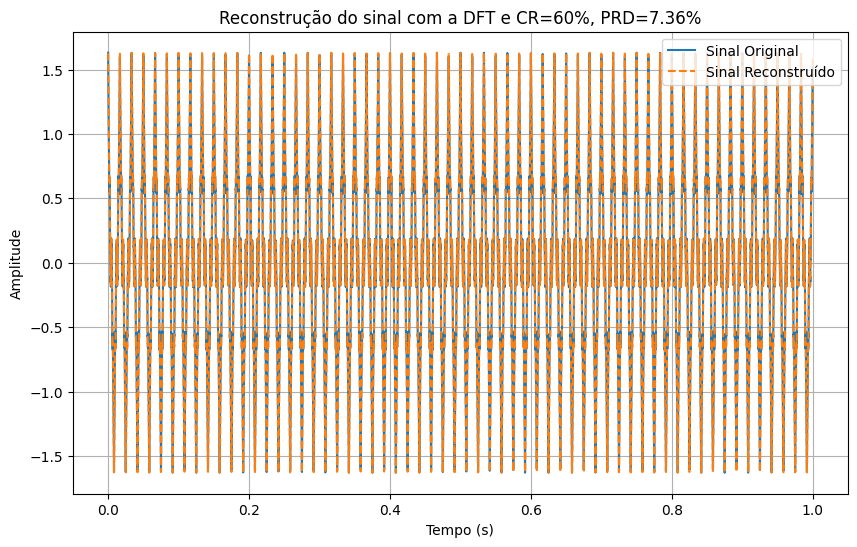

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("cosamp, dft")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256 # Número de pontos por ciclo
Nc = 12         # Número de ciclos
f = 60          # Frequência fundamental (Hz)
Fs = 8192       # Frequência de amostragem
Ts = 1 / Fs     # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DFT do sinal original
original_dft = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 60 # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DFT
A = np.fft.fft(np.eye(N), axis=0)
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=1):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dft = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=1)

    # Reconstrução do sinal no domínio do tempo usando IDFT
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DFT do sinal reconstruído
    reconstructed_dft[i, :] = np.fft.fft(sig)

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dft[idx] - reconstructed_dft[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dft = np.sum(reconstructed_dft) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DFT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()


cosamp, dct
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 

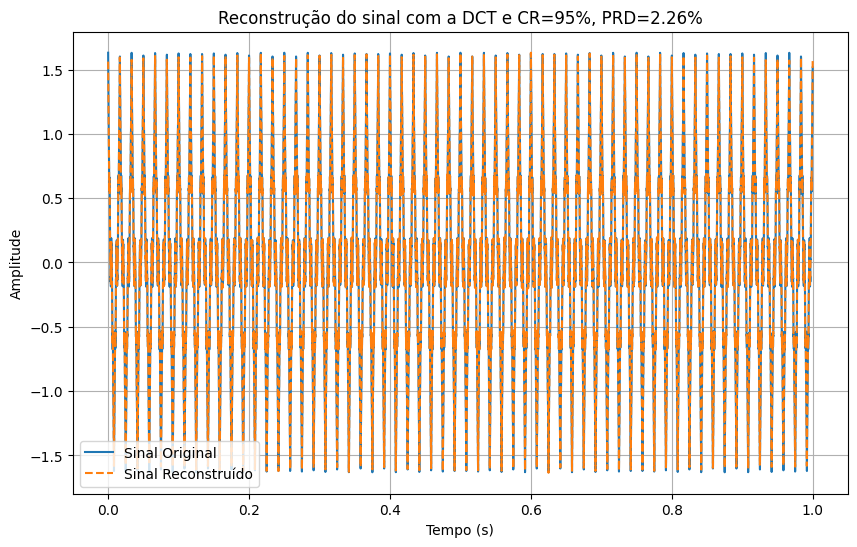

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

print("cosamp, dct")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12  # Número de ciclos
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DCT do sinal original
original_dct = dct(y, norm='ortho')  # DCT para o sinal original
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 95  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DCT
A = dct(np.eye(N), norm='ortho')  # DCT da matriz identidade
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=5):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dct = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência (DCT)
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=5)

    # Reconstrução do sinal no domínio do tempo usando a IDCT
    sig = idct(recovered_coeffs, norm='ortho')  # IDCT para reconstrução
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DCT do sinal reconstruído
    reconstructed_dct[i, :] = dct(sig, norm='ortho')

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dct[idx] - reconstructed_dct[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dct = np.sum(reconstructed_dct) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DCT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()
